## Jeff Alstott powerlaw Module

In [1]:
import powerlaw as pwl ### Jeff Alstott Module
import numpy as np
import matplotlib.pyplot as plt

In [14]:
xmin,xmax,alpha = 1,1000,1.5
value = False
func = pwl.Power_Law(xmin = xmin, xmax = xmax, discrete= value, parameters = [alpha]) 

### discrete = False for continuous distributions

def generate_pwl(xmax, n, func, value = True):
    data = []
    for i in range(n):
        a= func.generate_random(n = 1,estimate_discrete= value) 
        if a <= xmax:
            data.append(a[0])
    return np.asarray(data)


n = 1000## number of observations

### Here I generate artificial data, you can do the same with your data


In [15]:
artif_data =generate_pwl(xmax, n, func, value = True)

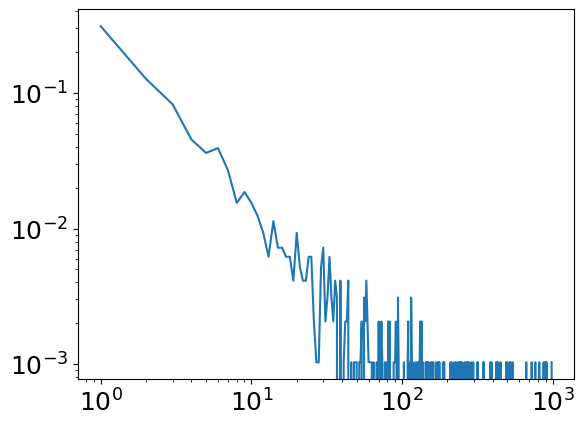

In [16]:
plt.plot(pwl.pdf(artif_data, linear_bins= True)[0][:-1],pwl.pdf(artif_data, linear_bins= True)[1])
plt.xscale('log')
plt.yscale('log');

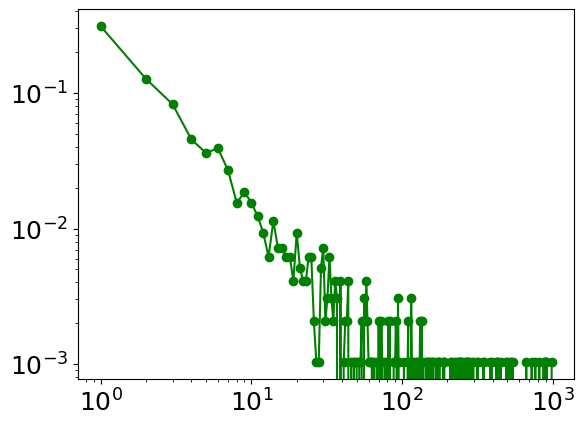

In [17]:
plt.plot(pwl.pdf(artif_data, linear_bins= True)[0][:-1],pwl.pdf(artif_data, linear_bins= True)[1], 'go-')
## in pwl.pdf interpola mettendo anche dei bn a zero
## non so la normalizzazione come la fa jeff Alstott
#plt.plot(x,px, 'ro-')
plt.xscale('log')
plt.yscale('log');

Calculating best minimal value for power law fit
Alpha is:  1.5580366412918676


Text(100, 0.001, 'alpha= 1.56')

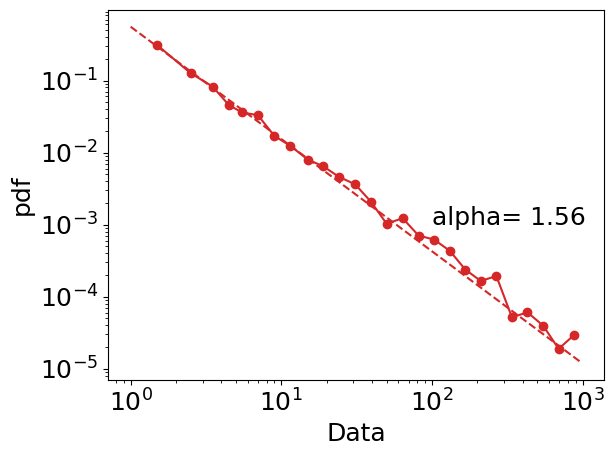

In [18]:
plt.rcParams['font.size'] = 18
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fit = pwl.Fit(artif_data,xmax= max(artif_data),parameter_range= {"alpha":[1,4]},discrete = value)
exp = fit.power_law.alpha
print('Alpha is: ', exp)
pwl.plot_pdf(artif_data,color = 'tab:red', marker = 'o')
fit.power_law.plot_pdf(artif_data,color = 'tab:red' ,linestyle = '--')
ax.set_xlabel(r'Data')
ax.set_ylabel(r'pdf')
ax.text(100,0.001,"alpha= {}".format(round(exp,2)))

## Calculate PValue 

In [318]:
#fit = pwl.Fit(artif_data,xmax = max(artif_data),parameter_range= {"alpha":[1,4]},discrete = True)
#fit.generat

In [19]:
fit = pwl.Fit(artif_data,xmax = max(artif_data),parameter_range= {"alpha":[1,4]},discrete = value)
#func = pwl.Power_Law(xmin = fit.power_law.xmin, xmax = fit.power_law.xmax, parameters = [fit.power_law.alpha], discrete = True)
## (fit  racchiude tutti i Fit di tutte le funzioni, l'xmin è minimizzato solo per il power law fit)
#n = 1000
Ds =[]
xmin_found = fit.power_law.xmin
#func.power_law.
num_iter = 100
for f in range(num_iter):
    #xmax,alpha = 1,10000,1.5
    gen = generate_pwl(xmax,n, fit.power_law)
    fit2 = pwl.Fit(gen,xmin = (xmin_found, xmin_found +1),xmax =xmax,parameter_range= {"alpha":[1,4]},discrete = value)
    Ds.append(fit2.power_law.D)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

In [20]:
Dmyfit =  fit.power_law.D
Ds = np.array(Ds)
pvalue = np.sum(Dmyfit <= Ds)/len(Ds)
pvalue # must be higher than e.g. 0.1
## forse mi dava sempre 1 anche in tesi

0.08

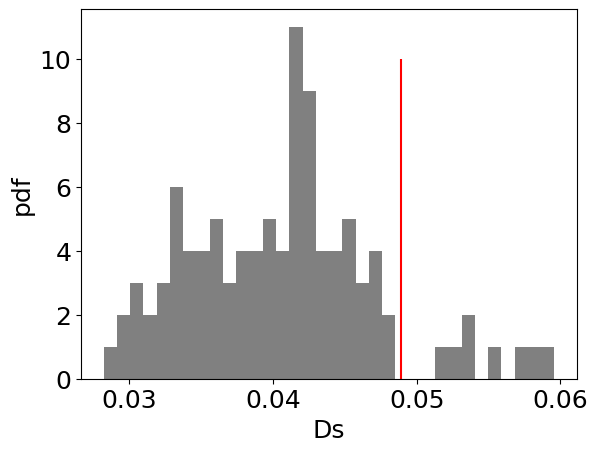

In [22]:
plt.hist(Ds, bins = 34,color = 'grey')
plt.vlines(Dmyfit, 0,10,color ='red')
plt.xlabel('Ds')
plt.ylabel('pdf');
## il range di fit è piccolo..

## Martin Gerlach Testing Statistical Laws in Complex Systems package

## (I have renaimed powerlaw.py module into power.py otherwise there is conflict with powerlaw by Alstott)

In [36]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.cm as cm
cmap = cm.tab10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:

from data_io_ts import *
from stats import xdata_to_xnx, x_autocorr_sm_ext
from powerlaw_fit import *


# import setup for figure layout (see src/modules_plotting.py to customize)
from modules_plotting import * 

In [42]:
fit = pwl.Fit(artif_data,xmax = max(artif_data),parameter_range= {"alpha":[1,4]},discrete = value)
xmin_found = fit.power_law.xmin

Calculating best minimal value for power law fit


In [40]:
value

False

In [43]:
x_data = artif_data
xmin = xmin_found
x,nx = xdata_to_xnx(x_data,norm=False,xmin=xmin,xmax=xmax)

N = np.sum(nx)
px = nx/N
Fx = 1-np.cumsum(px)

## Fit: powerlaw
if value == True:
    print('here')
    result = fit_power_disc_sign(x,nx,xmin=xmin,xmax=xmax)
    alpha = result['alpha']
    px_fit = pdf_power_disc(x,xmin,xmax,alpha)
    Fx_fit = 1 - cdf_power_disc(x,xmin,xmax,alpha)
else:
    result = fit_power_cont_sign(x,nx,xmin=xmin,xmax=xmax)
    alpha = result['alpha']
    px_fit = pdf_power_cont(x,xmin,xmax,alpha)
    Fx_fit = 1 - cdf_power_cont(x,xmin,xmax,alpha) ### GIUSTO COSì
alpha

1.4926950166776878

(1e-06, 1)

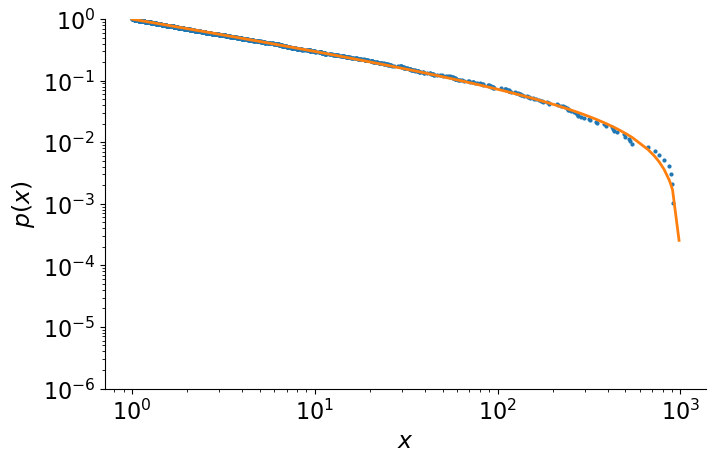

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)

## Plot the distribution
x_ = x
y_ = Fx

c_ = cmap(0)
ax.plot(x_,y_,marker='o',ms=2,lw=0,c = c_,label = 'Data')

## Plot the fit
c_ = cmap(1)
x_ = x
y_ = Fx_fit
plt.plot(x_,y_,lw=2,c=c_, label = 'Fit')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$x$')#,labelpad=0)
ax.set_ylabel(r'$p(x)$')
ax.set_ylim(10**-6,10**0)

In [360]:
xmin_found

5.0

Text(0, 0.5, '$p(x)$')

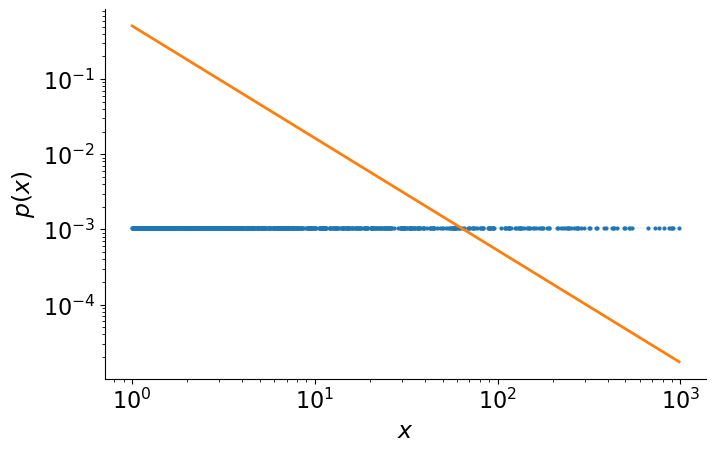

In [45]:
x_data = artif_data
xmin = xmin_found
x,nx = xdata_to_xnx(x_data,norm=False,xmin=xmin,xmax=xmax)

N = np.sum(nx)
px = nx/N
Fx = 1-np.cumsum(px)

## Fit: powerlaw
if value == True:
    result = fit_power_disc_sign(x,nx,xmin=xmin,xmax=xmax)
    alpha = result['alpha']
    px_fit = pdf_power_disc(x,xmin,xmax,alpha)
    Fx_fit = 1 - cdf_power_disc(x,xmin,xmax,alpha) ### GIUSTO COSì
else:
    result = fit_power_cont_sign(x,nx,xmin=xmin,xmax=xmax)
    alpha = result['alpha']
    px_fit = pdf_power_cont(x,xmin,xmax,alpha)
    Fx_fit = 1 - cdf_power_cont(x,xmin,xmax,alpha)


fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)

## Plot the distribution
x_ = x
y_ = px

c_ = cmap(0)
ax.plot(x_,y_,marker='o',ms=2,lw=0.1,c = c_,label = 'Data')

## Plot the fit
c_ = cmap(1)
x_ = x
y_ = px_fit
plt.plot(x_,y_,lw=2,c=c_, label = 'Fit')

ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_ylim(10**-3,10**-1)

ax.set_xlabel(r'$x$')#,labelpad=0)
ax.set_ylabel(r'$p(x)$')


In [46]:
np.random.seed(42)

nrep = 10**3
q1,q2 = 1,99
result = x_autocorr_sm_ext(np.log(x_data),nrep=nrep,q=[q1,q2])
x = result['tau']
y_mu,y_1,y_2 = result['C']
y_mu_rand,y_1_rand,y_2_rand = result['C_rand']

## here we calculate from t=0,1,...,t^* where t^* is the first point
## where true C(t) is within the q-percentiles of the random

# ind_t_star = np.where( (y_mu<=y_2_rand)&(y_mu>=y_1_rand) )[0][1]
ind_t_star = np.where(y_1<=y_2_rand)[0][2]
tau_star = x[ind_t_star]

print('Autocorrelation time: ',tau_star)

Autocorrelation time:  2


Text(0.8, 0.6, '$\\tau^*=2$')

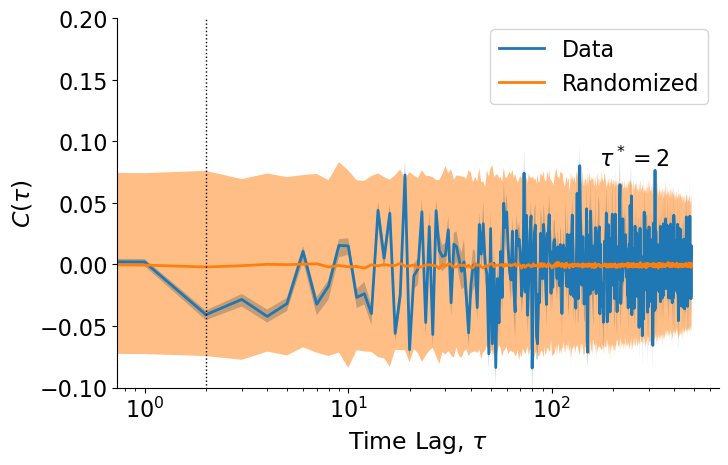

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1)#, figsize=fig_size)

alpha_val = .5
## Plot the empirical autocorrelation
x_ = x
y_ = y_mu
z1_ = y_1
z2_ = y_2
c_ = cmap(0)
ax.plot(x_,y_,c = c_,lw=lw, label = 'Data')
ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)



## Plot the randomized autocorrelation
x_ = x
y_ = y_mu_rand
z1_ = y_1_rand
z2_ = y_2_rand
c_ = cmap(1)
ax.plot(x_,y_,c = c_,lw=lw, label = 'Randomized')
ax.fill_between(x_,z1_,z2_,color=c_,alpha=alpha_val,lw=0)


ax.plot([tau_star,tau_star],[-1,1],lw=1,color='black',ls=':')


## Layout stuff
ax.legend(loc='upper right')

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r'Time Lag, $\tau$')#,labelpad=0)
ax.set_ylabel(r'$C(\tau)$')
ax.set_ylim(-0.1,0.2)


x_annot_tau = 0.8
y_annot_tau = 0.6
ax.annotate(r'$\tau^*=%s$'%(int(tau_star)),xy=(x_annot_tau,y_annot_tau),xycoords = 'axes fraction')

In [48]:
nrep_synth = 100 ## number of synthetic datasets to generate for empirical p-value (i have called this niter above)

x,nx = xdata_to_xnx(x_data,norm=False,xmin=xmin,xmax=xmax)
if value == True:
    result = fit_power_disc_sign(x,nx,xmin=xmin,xmax=xmax,nrep_synth=nrep_synth)
else:
    result = fit_power_cont_sign(x,nx,xmin=xmin,xmax=xmax,nrep_synth=nrep_synth)
    
    
alpha = result['alpha'] ## fitted parameter alpha
pval = result['pval'] ## p-value
KS = result['KS'] ## KS-distance

print('Original dataset. N = %s'%(N))
print('Empirical p-value from %s synthetic datasets: '%(nrep_synth), pval)

Original dataset. N = 970
Empirical p-value from 100 synthetic datasets:  0.6


In [49]:
p_sub = 1./tau_star ## 0 ... 1 (keep nothing ... keep all); we set 1/tau_star
N_sub = int(p_sub*N)
nrep_synth = 100 ## number of synthetic datasets to generate for empirical p-value


## subsample -- take N_sub samples from x_data without replacement
x_data_sub = np.random.choice(x_data,size=N_sub,replace=False)
x,nx = xdata_to_xnx(x_data_sub,norm=False,xmin=xmin,xmax=xmax)
result = fit_power_disc_sign(x,nx,xmin=xmin,xmax=xmax,nrep_synth=nrep_synth) if value else fit_power_cont_sign(x,nx,xmin=xmin,xmax=xmax,nrep_synth=nrep_synth)

alpha = result['alpha'] ## fitted parameter alpha
pval = result['pval'] ## p-value
KS = result['KS'] ## KS-distance

print(r'Subsampled dataset: n = %s (n/N ~ %s)'%(N_sub,p_sub)) 
print('Empirical p-value from %s synthetic datasets: '%(nrep_synth), pval)

Subsampled dataset: n = 485 (n/N ~ 0.5)
Empirical p-value from 100 synthetic datasets:  0.22999999999999998
